#                    CHENNAI WATER CRISIS - REFLECTION OVER THE YEARS
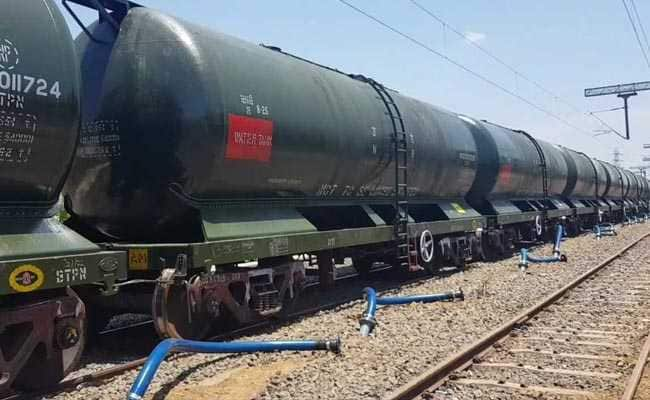
 ##### Water Crisis In Chennai: Water supply by trains would be less than 2 per cent of city's daily demand.

Chennai is a city located in the Indian state Tamil Nadu. It serves as the capital of Tamil Nadu, and the city and surrounding area serve as a major economic centers in India. 
Recently this area has been suffering from serious water shortages. This is due in part to two years of inadequate monsoon seasons, but increasing urbanization have caused some encroachment on water bodies in and around the region. In this notebook we are going through a dataset posted on Kaggle with the reservoir levels and rainfall levels in Chennai from 2004 until June 2019. 

We will be looking through to see if we can identify any trends in the data, and by providing visuals hopefully we can share just how dire the situation in Chennai is. Perhaps we can see whether or not the rainfall data included is tied to the reservoir levels.

Reservoir levels in the dataset are reported in million cubic feet (mcft) and rainfall levels are reported in millimeters (mm).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime
import seaborn as sns
import matplotlib as mpl

%matplotlib inline


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Here, we have imported the required modules. Now let us read the data from the csv files got from the Kaggle website.
We have two datasets to deal with, one dataset contains the reservoir data and the other contains the rainfall data. Each dataset contains four columns- 'POONDI','CHOLAVARAM','REDHILLS' and 'CHEMBARAMBAKKAM' which are the major sources of water to Chennai. 

In [2]:
reservoir=pd.read_csv("chennai_reservoir_levels.csv",parse_dates=['Date'])
rainfall=pd.read_csv("chennai_reservoir_rainfall.csv",parse_dates=['Date'])
reservoir.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-02-01,3.9,0.0,268.0,0.0
2,2004-03-01,3.9,0.0,267.0,0.0
3,2004-04-01,3.9,0.0,267.0,0.0
4,2004-05-01,3.8,0.0,267.0,0.0


In [3]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-02-01,0.0,0.0,0.0,0.0
2,2004-03-01,0.0,0.0,0.0,0.0
3,2004-04-01,0.0,0.0,0.0,0.0
4,2004-05-01,0.0,0.0,0.0,0.0


#### Let us analyze the maximum and the minimum amount of rainfall as well as the highest and the lowest reservoir levels.



In [4]:
print("Highest water level in Poondi: ",reservoir['POONDI'].max())
print("Highest water level in Cholavaram: ",reservoir['CHOLAVARAM'].max())
print("Highest water level in Redhills: ",reservoir['REDHILLS'].max())
print("Highest water level in Chembarambakkam: ",reservoir['CHEMBARAMBAKKAM'].max())

Highest water level in Poondi:  3231.0
Highest water level in Cholavaram:  896.0
Highest water level in Redhills:  3300.0
Highest water level in Chembarambakkam:  3396.0


In [5]:
print("Lowest water level in Poondi: ",reservoir['POONDI'].min())
print("Lowest water level in Cholavaram: ",reservoir['CHOLAVARAM'].min())
print("Lowest water level in Redhills: ",reservoir['REDHILLS'].min())
print("Lowest water level in Chembarambakkam: ",reservoir['CHEMBARAMBAKKAM'].min())

Lowest water level in Poondi:  0.9
Lowest water level in Cholavaram:  0.0
Lowest water level in Redhills:  0.0
Lowest water level in Chembarambakkam:  0.0


In [6]:
print("Highest rainfall in Poondi: ",rainfall['POONDI'].max())
print("Highest rainfall in Cholavaram: ",rainfall['CHOLAVARAM'].max())
print("Highest rainfall in Redhills: ",rainfall['REDHILLS'].max())
print("Highest rainfall in Chembarambakkam: ",rainfall['CHEMBARAMBAKKAM'].max())

Highest rainfall in Poondi:  300.0
Highest rainfall in Cholavaram:  293.0
Highest rainfall in Redhills:  320.0
Highest rainfall in Chembarambakkam:  475.0


In [7]:
print("Lowest rainfall in Poondi: ",rainfall['POONDI'].min())
print("Lowest rainfall in Cholavaram: ",rainfall['CHOLAVARAM'].min())
print("Lowest rainfall in Redhills: ",rainfall['REDHILLS'].min())
print("Lowest rainfall in Chembarambakkam: ",rainfall['CHEMBARAMBAKKAM'].min())

Lowest rainfall in Poondi:  0.0
Lowest rainfall in Cholavaram:  0.0
Lowest rainfall in Redhills:  0.0
Lowest rainfall in Chembarambakkam:  0.0


In [8]:
reservoir.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,1133.272203,240.020572,1568.345573,1321.381645
std,1026.009311,274.601731,890.363617,957.057834
min,0.900000,0.000000,0.000000,0.000000
25%,213.000000,22.300000,849.000000,471.500000
50%,782.000000,92.000000,1630.000000,1225.000000
75%,2006.000000,460.000000,2236.000000,2083.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [9]:
rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862
std,12.755029,14.078840,15.060551,16.287227
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


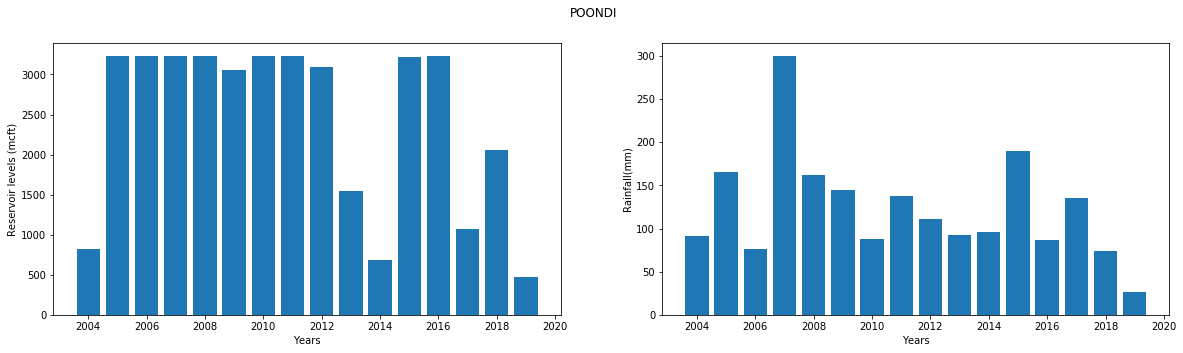

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['POONDI'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels (mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['POONDI'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('POONDI')

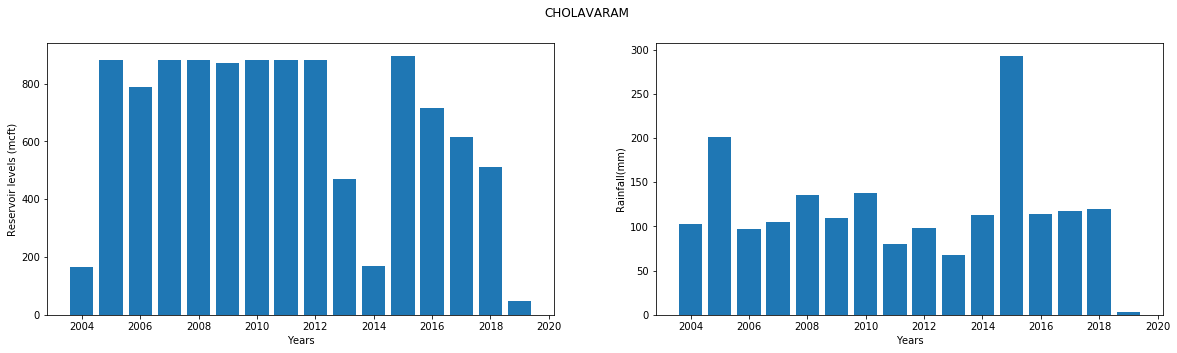

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['CHOLAVARAM'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels (mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['CHOLAVARAM'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('CHOLAVARAM')

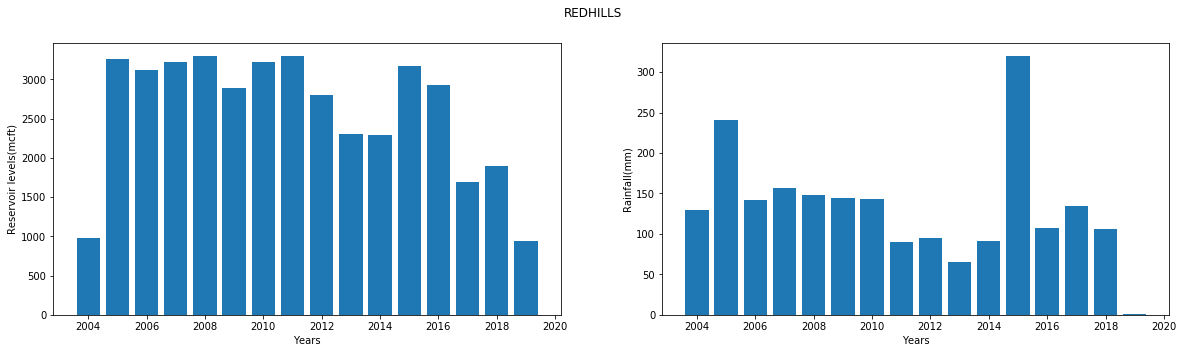

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['REDHILLS'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels(mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['REDHILLS'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('REDHILLS')

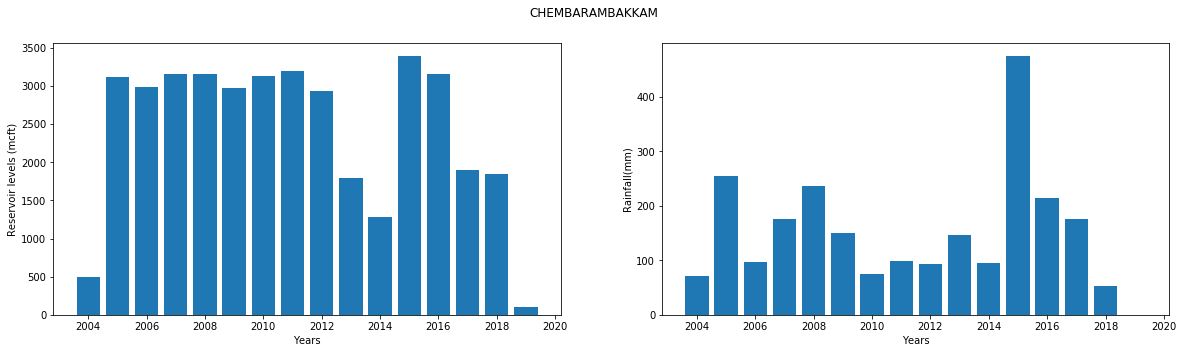

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.bar(reservoir['Date'].dt.year,reservoir['CHEMBARAMBAKKAM'])
plt.xlabel('Years')
plt.ylabel('Reservoir levels (mcft)')
plt.subplot(122)
plt.bar(rainfall['Date'].dt.year,rainfall['CHEMBARAMBAKKAM'])
plt.xlabel('Years')
plt.ylabel('Rainfall(mm)')
plt.suptitle('CHEMBARAMBAKKAM')

In [14]:
res_year = reservoir.groupby(reservoir.Date.dt.year).sum().reset_index()
rain_year = rainfall.groupby(rainfall.Date.dt.year).sum().reset_index()
res_year

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004,28462.71,6976.00,80849.10,25138.00
1,2005,263778.42,53936.70,535995.46,212191.00
2,2006,667057.00,177006.00,746190.00,757491.00
3,2007,655143.00,104533.00,860179.00,626021.00
4,2008,681616.00,199693.00,894929.00,804090.00
5,2009,673871.00,151431.97,718951.89,655422.15
6,2010,602806.00,139494.00,746524.00,737483.00
7,2011,875660.00,182321.00,939264.00,909683.00
8,2012,637871.00,82692.00,685232.00,575234.00
9,2013,195988.00,36518.00,483300.00,360972.00


In [15]:
rain_year

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004,1099.00,1230.0,1158.4,952.00
1,2005,2031.00,2253.0,2395.5,2428.00
2,2006,1035.00,1330.0,1328.0,1488.00
3,2007,1703.00,1400.0,1531.4,1353.00
4,2008,1524.00,1685.0,1755.0,1578.00
5,2009,982.85,1089.0,1281.0,1542.00
6,2010,1120.50,1914.0,1649.6,1449.00
7,2011,1391.20,1141.2,1515.4,2019.00
8,2012,1100.60,909.0,932.7,824.30
9,2013,1119.00,950.0,1033.4,1262.55


In [16]:
res_year1=pd.melt(res_year,id_vars=["Date"])
res_year1


,Date,variable,value
0,2004,POONDI,28462.71
1,2005,POONDI,263778.42
2,2006,POONDI,667057.00
3,2007,POONDI,655143.00
4,2008,POONDI,681616.00
5,2009,POONDI,673871.00
6,2010,POONDI,602806.00
7,2011,POONDI,875660.00
8,2012,POONDI,637871.00
9,2013,POONDI,195988.00


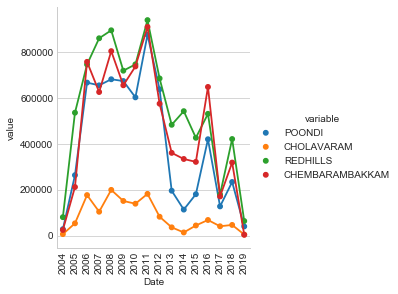

In [17]:
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('whitegrid')
g = sns.factorplot(x="Date", y="value", hue='variable',data=res_year1)
g.set_xticklabels(rotation=90)

In [18]:
rain_year1=pd.melt(rain_year,id_vars=["Date"])
rain_year1

,Date,variable,value
0,2004,POONDI,1099.00
1,2005,POONDI,2031.00
2,2006,POONDI,1035.00
3,2007,POONDI,1703.00
4,2008,POONDI,1524.00
5,2009,POONDI,982.85
6,2010,POONDI,1120.50
7,2011,POONDI,1391.20
8,2012,POONDI,1100.60
9,2013,POONDI,1119.00


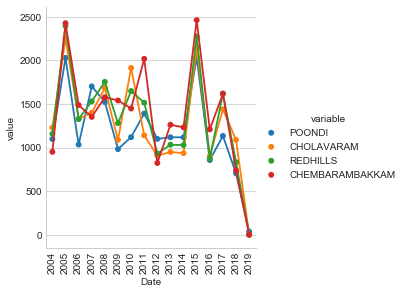

In [19]:
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('whitegrid')
g = sns.factorplot(x="Date", y="value", hue='variable',data=rain_year1)
g.set_xticklabels(rotation=90)

In [20]:
res_year_aggregate = res_year.iloc[:, 1:].sum(axis=1)
res_year_aggregate

0      141425.81
1     1065901.58
2     2347744.00
3     2245876.00
4     2580328.00
5     2199677.01
6     2226307.00
7     2906928.00
8     1981029.00
9     1076778.00
10    1005037.00
11     973800.50
12    1668102.00
13     519473.00
14    1021041.00
15     113826.00
dtype: float64

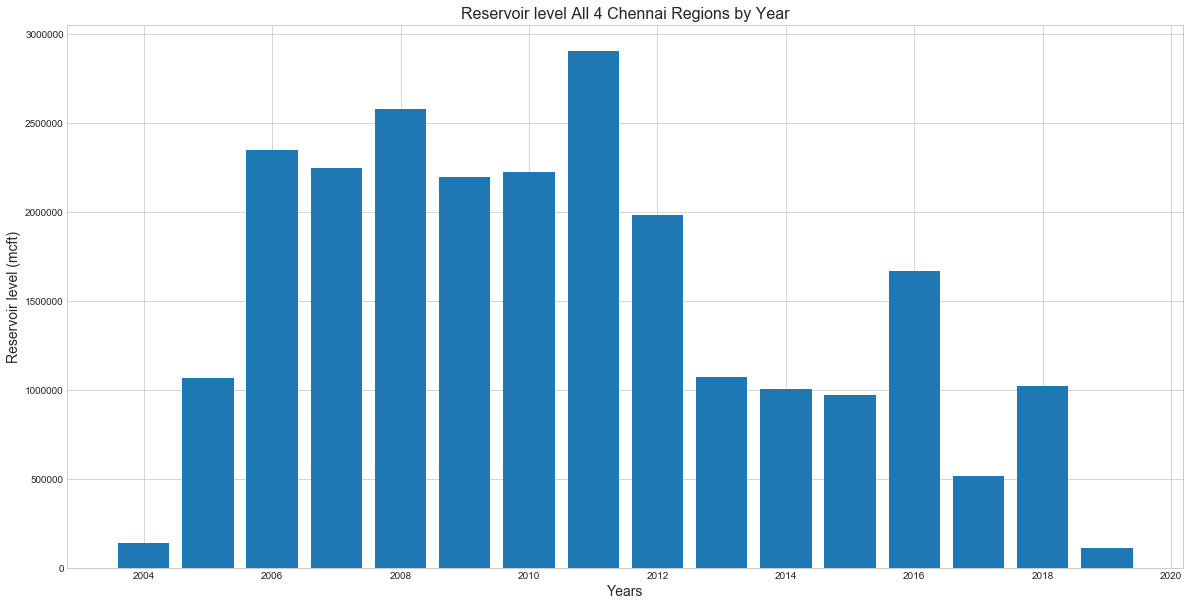

In [21]:
plt.figure(figsize=(20, 10))
plt.bar(res_year['Date'], res_year_aggregate)
plt.ylabel('Reservoir level (mcft)', size=14)
plt.xlabel('Years',size=14)
plt.title('Reservoir level All 4 Chennai Regions by Year', size=16)

In [22]:
rain_year_aggregate = rain_year.iloc[:, 1:].sum(axis=1)
rain_year_aggregate

0     4439.40
1     9107.50
2     5181.00
3     5987.40
4     6542.00
5     4894.85
6     6133.10
7     6066.80
8     3766.60
9     4364.95
10    4318.00
11    8928.70
12    3845.80
13    5814.40
14    3367.00
15      41.00
dtype: float64

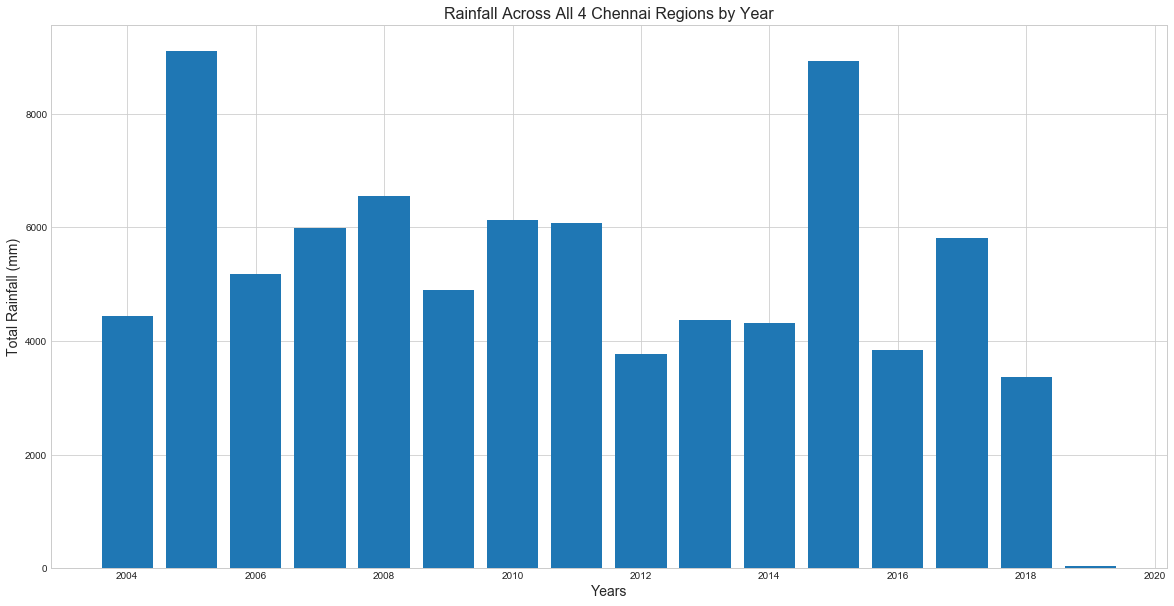

In [23]:
plt.figure(figsize=(20, 10))
plt.bar(rain_year['Date'], rain_year_aggregate)
plt.ylabel('Total Rainfall (mm)', size=14)
plt.xlabel('Years',size=14)
plt.title('Rainfall Across All 4 Chennai Regions by Year', size=16)

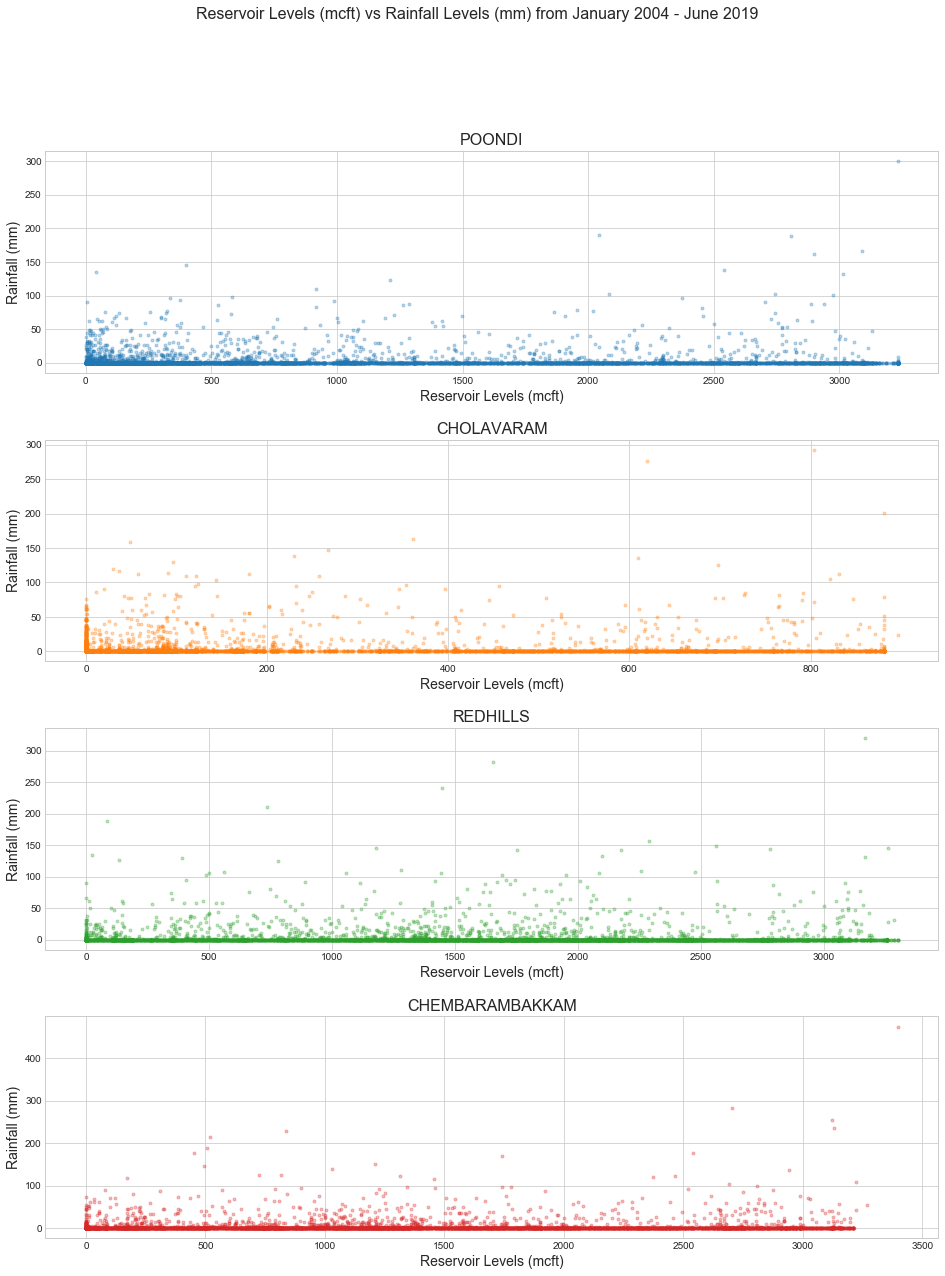

In [24]:
fig, ax = plt.subplots(4, 1, figsize=(16, 20))
for index, column in enumerate(reservoir.columns[1:]):
    ax[index].scatter(reservoir[column], rainfall[column],marker='.', color=colors[index], alpha=0.3)
    ax[index].set_ylabel('Rainfall (mm)', size=14)
    ax[index].set_title(column, size=16)
    ax[index].set_xlabel('Reservoir Levels (mcft)', size=14)
fig.suptitle('Reservoir Levels (mcft) vs Rainfall Levels (mm) from January 2004 - June 2019', size=16)
fig.subplots_adjust(hspace=0.3)

In [25]:
is_february = reservoir['Date'].dt.month == 2
is_day_one = reservoir['Date'].dt.day == 1
dry_season_res_levels = reservoir.loc[is_february & is_day_one, :].reset_index(drop=True)
dry_season_res_levels

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-02-01,3.9,0.0,268.0,0.0
1,2005-02-01,799.9,69.0,996.0,397.0
2,2006-02-01,3231.0,762.0,3100.0,2986.0
3,2007-02-01,2940.0,471.0,2532.0,2344.0
4,2008-02-01,3098.0,880.0,3174.0,3120.0
5,2009-02-01,3045.0,869.0,2876.0,2972.0
6,2010-02-01,2252.0,713.0,2037.0,2486.0
7,2011-02-01,3231.0,814.0,3243.0,3130.0
8,2012-02-01,2928.0,859.0,2632.0,2866.0
9,2013-02-01,1523.0,471.0,2166.0,1241.0


In [26]:
dry_season_res_all_regions = dry_season_res_levels.iloc[:, 1:].sum(axis=1)
dry_season_res_all_regions

0       271.9
1      2261.9
2     10079.0
3      8287.0
4     10272.0
5      9762.0
6      7488.0
7     10418.0
8      9285.0
9      5401.0
10     3337.0
11     3152.0
12     9833.0
13     1666.0
14     4938.0
15     1376.0
dtype: float64

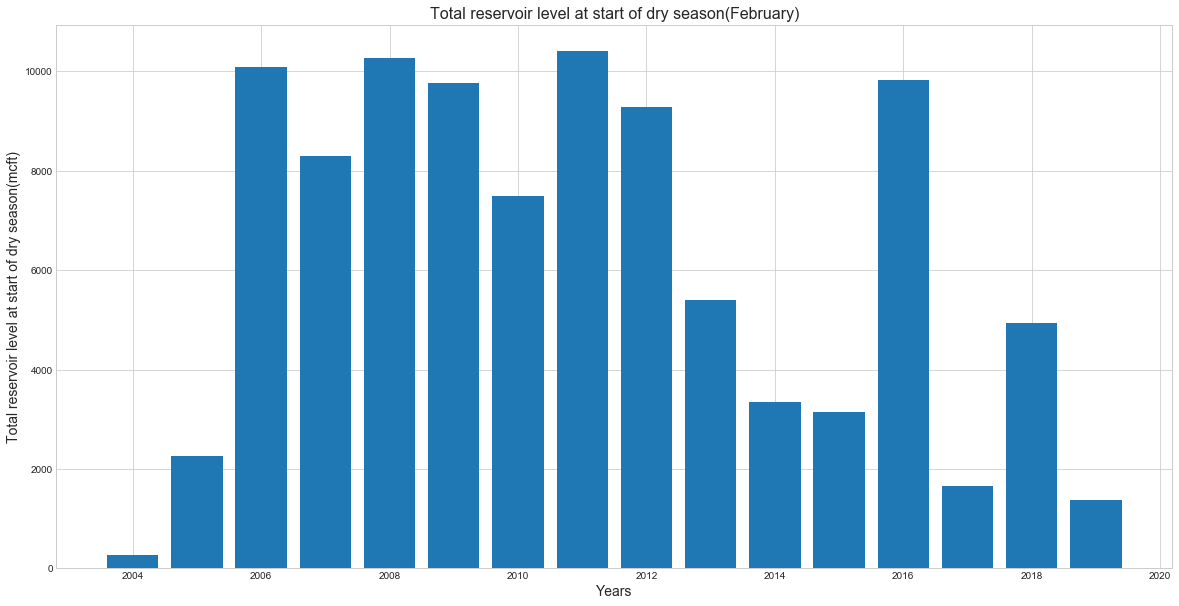

In [27]:
plt.figure(figsize=(20, 10))
plt.bar(dry_season_res_levels['Date'].dt.year,dry_season_res_all_regions)
plt.ylabel('Total reservoir level at start of dry season(mcft)', size=14)
plt.xlabel('Years',size=14)
plt.title('Total reservoir level at start of dry season(February)', size=16)

In [28]:
res_months = reservoir.groupby(reservoir.Date.dt.month).sum().reset_index()
rain_months = rainfall.groupby(rainfall.Date.dt.month).sum().reset_index()

In [29]:
res_months

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,1,743108.48,178588.90,913601.70,769532.00
1,2,632145.58,140179.70,813898.20,658535.00
2,3,638623.68,130318.90,884665.20,701213.00
3,4,547819.40,100081.60,788328.40,630007.00
4,5,484922.50,86260.60,732631.26,617888.00
5,6,398161.40,71896.10,649966.73,552540.00
6,7,354022.10,70026.10,619217.10,528447.00
7,8,350438.50,66386.60,591675.30,506424.00
8,9,402253.49,68635.10,574049.70,488305.00
9,10,478319.30,90310.60,610533.17,519402.00


In [30]:
rain_months

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,1,586.40,713.0,737.0,603.00
1,2,758.60,988.6,1012.8,1116.55
2,3,983.40,868.0,867.0,1085.50
3,4,1029.40,957.0,830.5,1045.50
4,5,1245.10,1215.0,1128.5,1402.50
5,6,1179.80,1409.0,1505.1,1533.40
6,7,1594.50,1828.2,1830.4,1889.50
7,8,2150.40,2055.0,2413.1,2180.50
8,9,1985.65,2047.0,2042.0,2107.10
9,10,2775.20,3473.0,3958.3,3993.00


In [31]:
res_months_all = res_months.iloc[:, 1:].sum(axis=1)
res_months_all

0     2604831.08
1     2244758.48
2     2354820.78
3     2066236.40
4     1921702.36
5     1672564.23
6     1571712.30
7     1514924.40
8     1533243.29
9     1698565.07
10    2268166.03
11    2621749.48
dtype: float64

In [32]:
rain_months_all = rain_months.iloc[:, 1:].sum(axis=1)
rain_months_all

0      2639.40
1      3876.55
2      3803.90
3      3862.40
4      4991.10
5      5627.30
6      7142.60
7      8799.00
8      8181.75
9     14199.50
10    13303.60
11     6371.40
dtype: float64

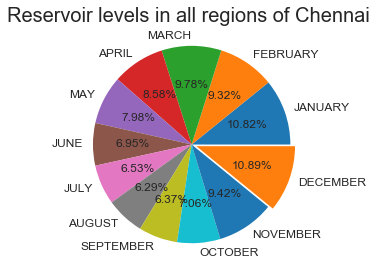

In [43]:
labels=['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
explode=[0,0,0,0,0,0,0,0,0,0,0,0.50]
plt.pie(res_months_all,labels=labels,radius=10,autopct='%0.2f%%',explode=explode,textprops={'fontsize': 12})
plt.suptitle('Reservoir levels in all regions of Chennai',size=20)
plt.axis('equal')
plt.show()

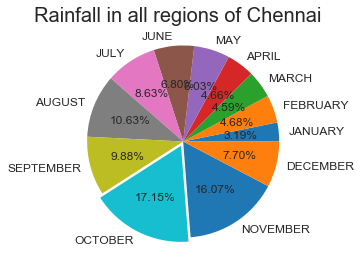

In [44]:
labels=['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']
explode=[0,0,0,0,0,0,0,0,0,0.50,0,0]
plt.pie(rain_months_all,labels=labels,radius=10,autopct='%0.2f%%',explode=explode,textprops={'fontsize': 12})
plt.suptitle('Rainfall in all regions of Chennai',size=20)
plt.axis('equal')
plt.show()